### scikit-mobility tutorials

# **NUM - Privacy Risk Assessment**

#### Simulate privacy attacks and assess risk with a worst-case scenario framework

#### First, we import the necessary libraries along with some utility functions

In [1]:
import numpy as np
import pandas as pd
from skmob.privacy import attacks
from skmob.core.trajectorydataframe import TrajDataFrame
from skmob.utils import constants

#### To more easily visualize how risk is computed, we use a dummy dataset.

In [2]:
trjdat = TrajDataFrame.from_file(filename="privacy_toy.csv", sep=",")

In [3]:
trjdat

,lat,lng,datetime,uid
0,43.843014,10.507994,2011-02-03 08:34:04,1
1,43.544270,10.326150,2011-02-03 09:34:04,1
2,43.708530,10.403600,2011-02-03 10:34:04,1
3,43.779250,11.246260,2011-02-04 10:34:04,1
4,43.843014,10.507994,2011-02-03 08:34:04,2
5,43.708530,10.403600,2011-02-03 09:34:04,2
6,43.843014,10.507994,2011-02-04 10:34:04,2
7,43.544270,10.326150,2011-02-04 11:34:04,2
8,43.544270,10.326150,2011-02-03 08:34:04,3
9,43.708530,10.403600,2011-02-03 09:34:04,3


#### Each different kind of attack is modeled as a separate class inheriting essential functionalities from a generic Attack class. We can instatiante an attack model by specifying the length of the background knowledge that we want to simulate.

In [4]:
at = attacks.LocationAttack(k=2)

#### To compute privacy risk for all the users in the data, simply call the assess_risk function on the dataframe that we want to analyze.

In [5]:
at.assess_risk(trjdat)

,uid,risk
0,1,0.333333
1,2,0.500000
2,3,0.333333
3,4,0.333333
4,5,0.250000
5,6,0.250000
6,7,0.500000


### **Assessment workings and options**

#### To change the background knowledge size, we can either change the k parameter with the set_k function, or instantiate a new attack model

In [6]:
at.set_k(3)
at.assess_risk(trjdat)

,uid,risk
0,1,0.500000
1,2,1.000000
2,3,0.500000
3,4,0.333333
4,5,0.333333
5,6,0.250000
6,7,1.000000


#### Not all combinations may be evaluated during the assessment: if one with maximum risk is found (risk equal to 1.0), subsequent combinations are simply discarded, for efficiency.
#### If we want to show all the possible combinations we can use the 'instance_analysis' parameter
####  As all combinations are calculated and evaluated, this may require long times and high memory usage

In [7]:
at.assess_risk(trjdat, instance_analysis=True)

,instance,reid_prob
uid,,
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.333333
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.500000
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.333333
1,"([43.544270000000004, 10.32615, 2011-02-03 09:...",0.333333
2,"([43.843013899999995, 10.507994, 2011-02-03 08...",1.000000
2,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.333333
2,"([43.843013899999995, 10.507994, 2011-02-03 08...",1.000000
2,"([43.708529999999996, 10.4036, 2011-02-03 09:3...",0.333333
3,"([43.544270000000004, 10.32615, 2011-02-03 08:...",0.333333


#### The computation's complexity is dominated by the nunmber of combinations generated, which itself depends on both the background knowledge length and the average length of each user's trajectory. 

\begin{equation*}
\mathcal{O} \Bigl(  \binom{l}{k} |T|  matching \Bigr)
\end{equation*}
#### where 'l' is the length of the current trajectory considered, 'k' is the background knowledge length, 'T' is the set of all target trajectories and 'matching' stands for the cost of the matching operation between each combination and the data.

#### A subset of the users can be specified with the parameter 'targets', to restrict the calculation to just some of the data. The parameter can be either a list or a dataframe. The user ids contained in the structure will be the ones processed for risk assessment.
#### Probability of reidentification is still computed against the original data. So the entire dataset is still used for the matching.
#### Can be used in combination with instance_analysis to isolate particular individuals and understand what combinations pose a threat.

In [8]:
t = [1,2]
at.assess_risk(trjdat, targets=t, instance_analysis=True)

,instance,reid_prob
uid,,
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.333333
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.500000
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.333333
1,"([43.544270000000004, 10.32615, 2011-02-03 09:...",0.333333
2,"([43.843013899999995, 10.507994, 2011-02-03 08...",1.000000
2,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.333333
2,"([43.843013899999995, 10.507994, 2011-02-03 08...",1.000000
2,"([43.708529999999996, 10.4036, 2011-02-03 09:3...",0.333333


#### Risk computation is slow. To check on the progress, we can use the progress flag

In [9]:
r = at.assess_risk(trjdat, progress=True)
r

computing risk: 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]


,uid,risk
0,1,0.500000
1,2,1.000000
2,3,0.500000
3,4,0.333333
4,5,0.333333
5,6,0.250000
6,7,1.000000


## **Attack Models**
#### The library provides eight attack models, each with a different background knowledge:
 - #### Location Attack: uses the locations visited.
 - #### LocationSequenceAttack: uses the locations visited with information about the order of visit
 - #### Location Time Attack: uses the locations visited and the time of visit. A precision for the time can be specified
 - #### Unique Location Attack: uses the unique locations visited, i.e., disregarding repeated visits to a same location. It operates on frequency vectors
 - #### Location Frequency Attack: uses the unique locations visited and the frequency with which they were visited. It operates on frequency vectors
 - #### Location Probability Attack: uses the unique locations visited and the probability with which they were visited. It operates on probability vectors
 - #### Location Proportion Attack: uses the unique locations visited and the relative proportion of the frequencies of visit. It operates on frequency vectors
 - #### Home Work Attack: uses the two most visited locations

#### Here are a couple examples to better understand how the matching of instances and data works.

### **Location Attack**

In [10]:
at = at = attacks.LocationAttack(k=2)
r = at.assess_risk(trjdat, targets=[1], instance_analysis=True)
r

,instance,reid_prob
uid,,
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.250000
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.250000
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.250000
1,"([43.544270000000004, 10.32615, 2011-02-03 09:...",0.250000
1,"([43.544270000000004, 10.32615, 2011-02-03 09:...",0.333333
1,"([43.708529999999996, 10.4036, 2011-02-03 10:3...",0.250000


#### Background knowledge consists of locations, with no information about the order of visit. So from the example above, from the first instance the following information is used:

In [11]:
display(trjdat[trjdat[constants.UID] == 1][[constants.LATITUDE,constants.LONGITUDE]].iloc[0:2])

,lat,lng
0,43.843014,10.507994
1,43.544270,10.326150


#### Which matches with:

In [12]:
trjdat[trjdat[constants.UID].isin([1,2,3,6])]

,lat,lng,datetime,uid
0,43.843014,10.507994,2011-02-03 08:34:04,1
1,43.544270,10.326150,2011-02-03 09:34:04,1
2,43.708530,10.403600,2011-02-03 10:34:04,1
3,43.779250,11.246260,2011-02-04 10:34:04,1
4,43.843014,10.507994,2011-02-03 08:34:04,2
5,43.708530,10.403600,2011-02-03 09:34:04,2
6,43.843014,10.507994,2011-02-04 10:34:04,2
7,43.544270,10.326150,2011-02-04 11:34:04,2
8,43.544270,10.326150,2011-02-03 08:34:04,3
9,43.708530,10.403600,2011-02-03 09:34:04,3


### **Location Sequence Attack**

In [13]:
at = at = attacks.LocationSequenceAttack(k=2)
r = at.assess_risk(trjdat, targets=[1], instance_analysis=True)
r

,instance,reid_prob
uid,,
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.333333
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.500000
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.333333
1,"([43.544270000000004, 10.32615, 2011-02-03 09:...",0.500000
1,"([43.544270000000004, 10.32615, 2011-02-03 09:...",0.333333
1,"([43.708529999999996, 10.4036, 2011-02-03 10:3...",0.250000


#### Background knowledge consists of locations and the information about the order of visit. So from the example above, from the first instance the following information is used, considering also the order the locations appear:

In [14]:
display(trjdat[trjdat[constants.UID] == 1][[constants.LATITUDE,constants.LONGITUDE]].iloc[0:2])

,lat,lng
0,43.843014,10.507994
1,43.544270,10.326150


#### Which matches with:

In [15]:
trjdat[trjdat[constants.UID].isin([1,2,6])]

,lat,lng,datetime,uid
0,43.843014,10.507994,2011-02-03 08:34:04,1
1,43.544270,10.326150,2011-02-03 09:34:04,1
2,43.708530,10.403600,2011-02-03 10:34:04,1
3,43.779250,11.246260,2011-02-04 10:34:04,1
4,43.843014,10.507994,2011-02-03 08:34:04,2
5,43.708530,10.403600,2011-02-03 09:34:04,2
6,43.843014,10.507994,2011-02-04 10:34:04,2
7,43.544270,10.326150,2011-02-04 11:34:04,2
18,43.843014,10.507994,2011-02-04 10:34:04,6
19,43.544270,10.326150,2011-02-04 11:34:04,6


#### Depending on the attack, risk changes according to the different matching criteria.

### **What are frequency and probability vectors?**
#### Two supporting data structures derived from trajectories. They are used for certain attacks and can be useful for observing certain aspects of the dataframe

In [16]:
from skmob.utils.utils import frequency_vector, probability_vector

In [17]:
frequency_vector(trjdat)

,uid,lat,lng,freq
0,1,43.544270,10.326150,1
1,1,43.708530,10.403600,1
2,1,43.779250,11.246260,1
3,1,43.843014,10.507994,1
4,2,43.544270,10.326150,1
5,2,43.708530,10.403600,1
6,2,43.843014,10.507994,2
7,3,43.544270,10.326150,1
8,3,43.708530,10.403600,1
9,3,43.779250,11.246260,1


In [18]:
probability_vector(trjdat)

,uid,lat,lng,prob
0,1,43.544270,10.326150,0.250000
1,1,43.708530,10.403600,0.250000
2,1,43.779250,11.246260,0.250000
3,1,43.843014,10.507994,0.250000
4,2,43.544270,10.326150,0.250000
5,2,43.708530,10.403600,0.250000
6,2,43.843014,10.507994,0.500000
7,3,43.544270,10.326150,0.250000
8,3,43.708530,10.403600,0.250000
9,3,43.779250,11.246260,0.250000


### **Special parameters**

#### Some attacks may be given some parameters during initialization which are unique to their own matching criteria, for example the **Location Time Attack**

#### A Location Time Attack uses the informaton of the time of visit. It is possible, to specify different precisions for the time of visit. 

In [19]:
at = at = attacks.LocationTimeAttack(k=2, time_precision="Day")
r = at.assess_risk(trjdat, targets=[1], instance_analysis=True)
r

,instance,reid_prob
uid,,
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",1.0
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.5
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",1.0
1,"([43.544270000000004, 10.32615, 2011-02-03 09:...",0.5
1,"([43.544270000000004, 10.32615, 2011-02-03 09:...",0.5
1,"([43.708529999999996, 10.4036, 2011-02-03 10:3...",0.5


In [20]:
at = at = attacks.LocationTimeAttack(k=2, time_precision="Month")
r = at.assess_risk(trjdat, targets=[1], instance_analysis=True)
r

,instance,reid_prob
uid,,
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.250000
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.250000
1,"([43.843013899999995, 10.507994, 2011-02-03 08...",0.250000
1,"([43.544270000000004, 10.32615, 2011-02-03 09:...",0.250000
1,"([43.544270000000004, 10.32615, 2011-02-03 09:...",0.333333
1,"([43.708529999999996, 10.4036, 2011-02-03 10:3...",0.250000


#### In the second case, the precision is lowered, and the risk changes accordingly

#### For Location Frequency, Location Probability and Location Proportion Attack a tolerance level can be specified for the matching of the frequency, probability and proportion of the visits, respectively

In [21]:
at = at = attacks.LocationFrequencyAttack(k=2, tolerance=0.1)
r = at.assess_risk(trjdat, targets=[1], instance_analysis=True)
r

,instance,reid_prob
uid,,
1,"([1.0, 43.544270000000004, 10.32615, 1.0], [1....",0.250000
1,"([1.0, 43.544270000000004, 10.32615, 1.0], [1....",0.333333
1,"([1.0, 43.544270000000004, 10.32615, 1.0], [1....",0.333333
1,"([1.0, 43.708529999999996, 10.4036, 1.0], [1.0...",0.250000
1,"([1.0, 43.708529999999996, 10.4036, 1.0], [1.0...",0.333333
1,"([1.0, 43.77925, 11.246260000000001, 1.0], [1....",0.333333


In [22]:
at = at = attacks.LocationFrequencyAttack(k=2, tolerance=0.8)
r = at.assess_risk(trjdat, targets=[1], instance_analysis=True)
r

,instance,reid_prob
uid,,
1,"([1.0, 43.544270000000004, 10.32615, 1.0], [1....",0.250000
1,"([1.0, 43.544270000000004, 10.32615, 1.0], [1....",0.333333
1,"([1.0, 43.544270000000004, 10.32615, 1.0], [1....",0.250000
1,"([1.0, 43.708529999999996, 10.4036, 1.0], [1.0...",0.250000
1,"([1.0, 43.708529999999996, 10.4036, 1.0], [1.0...",0.250000
1,"([1.0, 43.77925, 11.246260000000001, 1.0], [1....",0.250000


#### Risk may be visualized in many different ways. A very simple and intuitive way is a cumulative distribution function.

No handles with labels found to put in legend.


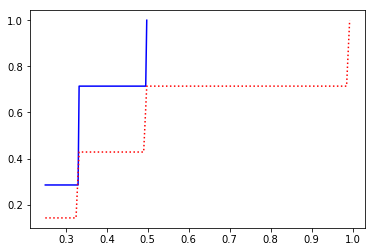

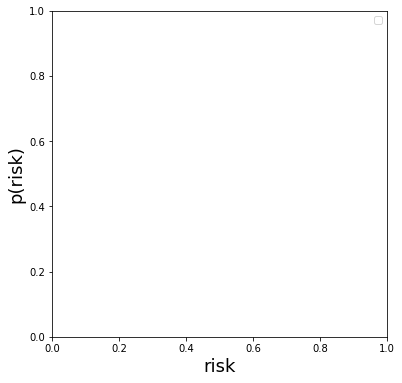

In [25]:
import numpy as np
import matplotlib.pyplot as plt
results = dict()
for my_k in [2,3]:
    at = at = attacks.LocationAttack(k=my_k)
    r = at.assess_risk(trjdat)
    results[my_k] = r
colors = {2:"blue",3:"red"}
styles = {2:"-",3:":"}
plt.figure(figsize=(6, 6))
plt.xlabel("risk",size=18)
plt.ylabel("p(risk)", size=18)
for k,r in results.items():
    data = r["risk"].tolist()
    values, base = np.histogram(data, bins=100)
    cumulative = np.cumsum(values)
    plt.plot(base[:-1],cumulative/len(data), c=colors[k], label="k="+str(k), linestyle=styles[k])
plt.legend()
plt.show()

#### On real data results should look like this
<img src="image18.png" width="400">